# Projeto ICD - Fórmula 1
### Caio Araújo e William Xavier

## Quais pilotos venceram mais corridas desde 1950 até 2021 ?

In [1]:
import numpy as np
import pandas as pd 
results = pd.read_csv("../../caiov/ICD/projeto_csv/results.csv")
drivers = pd.read_csv("../../caiov/ICD/projeto_csv/drivers.csv")

In [2]:
results = results.drop(["statusId", "points", "positionText", "number", "position", "milliseconds"], axis=1)
results = results.rename(columns={"positionOrder":"Vitórias_P"})
results = results[results.Vitórias_P == 1]

In [3]:
drivers = drivers.loc["0":,"driverId":"nationality"]
drivers["Pilotos"] = drivers["forename"] + " " + drivers["surname"]
drivers = drivers.drop(["dob", "number","forename","surname"], axis=1)
drivers = drivers.reindex(columns=['driverId','driverRef','code','Pilotos','nationality'])

In [4]:
drivers_results = pd.merge(drivers,results, on="driverId")

drivers_wins = drivers_results.groupby("Pilotos").count()
drivers_wins = drivers_wins.sort_values(by="Vitórias_P", ascending=False)[["Vitórias_P"]]
drivers_wins.iloc[:15]

,Vitórias_P
Pilotos,
Lewis Hamilton,96
Michael Schumacher,91
Sebastian Vettel,53
Alain Prost,51
Ayrton Senna,41
Fernando Alonso,32
Nigel Mansell,31
Jackie Stewart,27
Niki Lauda,25


## Medidas de Centralidade e Dispersão

In [5]:
Medidas_P = {"Média": drivers_wins["Vitórias_P"].mean(),
                  "Mediana": drivers_wins["Vitórias_P"].median(),
                  "Desvio Padrão": drivers_wins["Vitórias_P"].std()}
medidas_p = pd.Series(Medidas_P)

d_w_medidas = pd.DataFrame({"Vitórias_P": medidas_p})
d_w_medidas

,Vitórias_P
Média,9.445455
Mediana,4.000000
Desvio Padrão,15.269798


## Boxplot

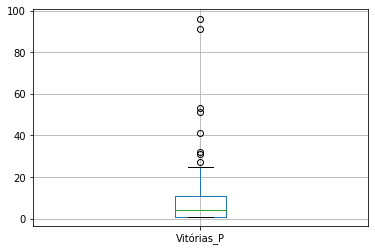

In [6]:
drivers_wins.boxplot(column="Vitórias_P")

## Quais montadoras/equipes venceram mais corridas ?

In [7]:
teams = pd.read_csv("../../caiov/ICD/projeto_csv/constructors.csv")

In [8]:
teams_results = pd.merge(teams,results, on="constructorId")
teams_results = teams_results.drop(["constructorRef","url"], axis=1)

In [9]:
teams_results = teams_results.rename(columns={"name":"Equipes"})
teams_results = teams_results.rename(columns={"constructorId":"Vitórias_E"})

In [10]:
teams_wins = teams_results.groupby("Equipes").count()
teams_wins = teams_wins.sort_values(by="Vitórias_E", ascending=False)[["Vitórias_E"]]
teams_wins.iloc[:15]

,Vitórias_E
Equipes,
Ferrari,239
McLaren,178
Mercedes,116
Williams,114
Red Bull,64
Team Lotus,45
Renault,35
Benetton,27
Brabham,23


## Medidas de Centralidade e Dispersão

In [11]:
Medidas_E = {"Média": teams_wins["Vitórias_E"].mean(),
                  "Mediana": teams_wins["Vitórias_E"].median(),
                  "Desvio Padrão": teams_wins["Vitórias_E"].std()}
medidas_e = pd.Series(Medidas_E)

t_w_medidas = pd.DataFrame({"Vitórias_E": medidas_e})
t_w_medidas

,Vitórias_E
Média,22.586957
Mediana,4.000000
Desvio Padrão,47.768226


## Boxplot

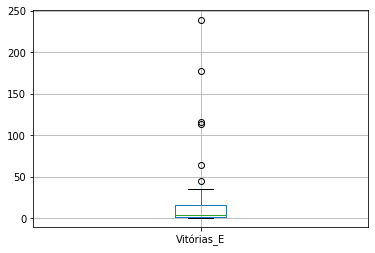

In [12]:
teams_wins.boxplot(column="Vitórias_E")

## Acidentes + Colisões por Temporada

In [13]:
races = pd.read_csv("../../caiov/ICD/projeto_csv/races.csv")
estatistica = pd.read_csv("../../caiov/ICD/projeto_csv/status.csv")
resultados = pd.read_csv("../../caiov/ICD/projeto_csv/results.csv")

df_acidentes = resultados[(resultados.statusId == 3) | (resultados.statusId == 4)]
df_acidentes = df_acidentes.drop(["points", "position", "positionText", "number", "time", "milliseconds", 
                            "fastestLap", "fastestLapTime", "fastestLapSpeed","laps", "rank", "positionOrder"], axis=1)

In [14]:
newdata = pd.merge(races, df_acidentes, on="raceId")
newdata = newdata.drop(["url", "grid", "time", "round", "date", "resultId", "driverId","raceId", "circuitId", "constructorId","name","statusId"], axis=1)
newdata = newdata.rename(columns={"year":"Temporada"})

q_acidentes = np.full((1834), 1)
newdata["Acidentes"]= q_acidentes

newdata = newdata.sort_values(by="Temporada")
newdata = newdata.reset_index(drop=True)
newdata = newdata.groupby("Temporada").sum()
newdata

,Acidentes
Temporada,
1950,13
1951,9
1952,5
1953,13
1954,13
...,...
2017,26
2018,26
2019,21


In [15]:
Medidas_A = {"Média": newdata["Acidentes"].mean(),
                  "Mediana": newdata["Acidentes"].median(),
                  "Desvio Padrão": newdata["Acidentes"].std()}
medidas_a = pd.Series(Medidas_A)

d_a_medidas = pd.DataFrame({"Acidentes": medidas_a})
d_a_medidas

,Acidentes
Média,25.472222
Mediana,25.000000
Desvio Padrão,12.844654


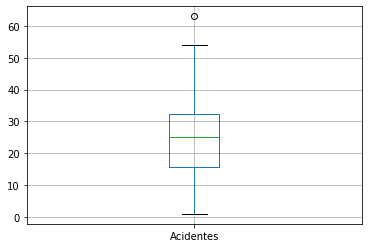

In [16]:
newdata.boxplot(column="Acidentes")

# DataFrame - Fórmula 1

In [ ]:
races = pd.read_csv("../../caiov/ICD/projeto_csv/races.csv")
races = races.drop(["time","url"], axis=1)

results = results.drop(["statusId", "points", "positionText", "number", "position", "milliseconds"], axis=1)
results = results.rename(columns={"positionOrder":"Vitórias_P"})

In [ ]:
teams_results2 = pd.merge(results,teams, on="constructorId")
teams_results2 = teams_results2.drop(["constructorRef","url", "Vitórias_P"], axis=1)
teams_results2 = teams_results2.drop(["nationality","raceId","resultId","grid","laps","time","fastestLap","rank","fastestLapTime","fastestLapSpeed"], axis=1)
teams_results2 #(F15)

drivers_results2 = pd.merge(results, drivers, on="driverId")
drivers_results2 = drivers_results2.rename(columns={"Vitórias_P":"Posição Final"})
drivers_results2 #(F10)

t_d_results = pd.merge(teams_results2,drivers_results2, on=["driverId","constructorId"])
t_d_results = t_d_results.drop(["rank","fastestLap","driverRef","laps","resultId"],axis=1)
t_d_results = t_d_results.reindex(columns=["raceId","driverId","Pilotos","code","nationality","constructorId","name","grid","Posição Final","time","fastestLapTime","fastestLapSpeed"])
t_d_results = t_d_results.rename(columns={"name":"Montadoras"})

formula_1 = pd.merge(t_d_results,races, on="raceId")
formula_1 = formula_1.reindex(columns=["raceId","round","circuitId","name","date","year","driverId","Pilotos","code","nationality","Montadoras","constructorId","grid","Posição Final","time","fastestLapTime","fastestLapSpeed"])
formula_1 = formula_1.drop_duplicates()
formula_1 = formula_1.sort_values(by="date")
formula_1

## Monaco (1950-1968) e (2005-2019)

In [ ]:
Monaco_1 = formula_1[formula_1.circuitId == 6]
Monaco_1 = Monaco_1[Monaco_1.year <= 1968]
Monaco_1 = Monaco_1.sort_values(by="Posição Final")
Monaco_1

In [ ]:
Monaco_2 = formula_1[formula_1.circuitId == 6]
Monaco_2 = Monaco_2[Monaco_2.year >= 2005]
Monaco_2 = Monaco_2.sort_values(by="Posição Final")
Monaco_2

## Monza (1950-1964) e (2006-2020)

In [ ]:
Monza_1 = formula_1[formula_1.circuitId == 14]
Monza_1 = Monza_1[Monza_1.year <= 1964]
Monza_1 = Monza_1.sort_values(by="date")
Monza_1

In [ ]:
Monza_2 = formula_1[formula_1.circuitId == 14]
Monza_2 = Monza_2[Monza_2.year >= 2006]
Monza_2 = Monza_2.sort_values(by="date")
Monza_2